<a href="https://colab.research.google.com/github/zw2788/MECE4520_project/blob/main/MECE_4520_LaptopPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Rregression

Neural Network

In [122]:
from typing import Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
data = pd.read_csv("https://raw.githubusercontent.com/zw2788/MECE4520_project/main/Laptop_Intel1012.csv")
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,CPU_benchmark,Ram,Ram_benchmark,Memory,Memory_benchmark,Gpu,GPU_benchmark,OpSys,Weight,Weight_benchmark,Price_euros
0,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,3397,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,2.3kg,2.30,418.64
1,898,Asus,Rog GL753VD-GC082T,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,5092,12GB,12,128GB SSD + 1TB HDD,58.98,AMD Radeon R5 M430,3.1,Windows 10,1.90kg,1.90,817.95
2,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,5901,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,1.86kg,1.86,469.00
3,399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,5901,12GB,12,1TB HDD,39.99,Intel HD Graphics 520,3.5,Windows 10,1.2kg,1.20,1535.00
4,476,Lenovo,Thinkpad T460s,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,3474,12GB,12,256GB SSD,22.99,Intel HD Graphics 6000,3.9,macOS,1.34kg,1.34,898.94


In [124]:
features = [
    "GPU_benchmark",
    "Memory_benchmark",
    "CPU_benchmark",
    "Weight_benchmark",
    "Ram_benchmark"

]
label = "Price_euros"

# train test split
X_raw, X_raw_test, Y, Y_test = train_test_split(data[features].values, data[label].values, test_size=0.2, random_state=42)


# Standardize the input
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)
X_test = scaler.transform(X_raw_test)

# formatting
Y = Y.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))

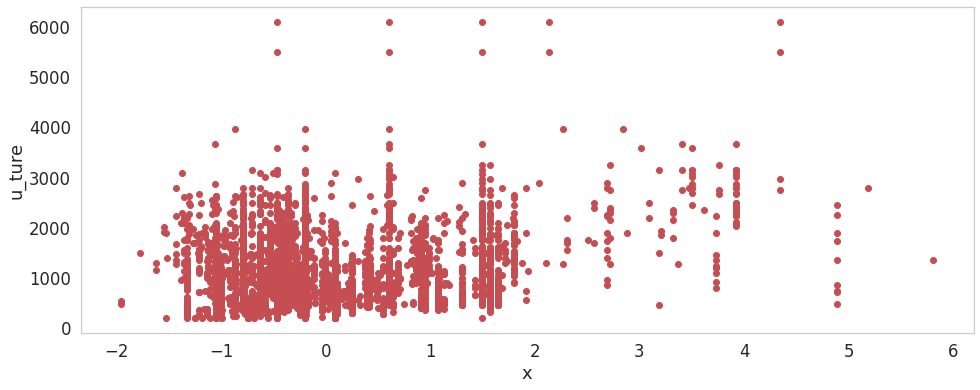

In [125]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(X, Y, 'ro')
axes.set_xlabel('x')
axes.set_ylabel('u_ture')
axes.grid()

In [126]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model=Sequential([
    Dense(units=80,kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(units=20,kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(units=5,kernel_initializer='normal',activation='relu'),
    Dropout(0.2),
    Dense(units=1,kernel_initializer='normal',activation='linear'),
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mse"])

history = model.fit(
    x=X,
    y=Y,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1,
    shuffle=True,
)

Epoch 1/20
26/26 [==============================] - 1s 9ms/step - loss: 1721904.3750 - mse: 1721904.3750 - val_loss: 1778211.2500 - val_mse: 1778211.2500
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 1452305.3750 - mse: 1452305.3750 - val_loss: 847482.1875 - val_mse: 847482.1875
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 581362.1250 - mse: 581362.1250 - val_loss: 337994.9688 - val_mse: 337994.9688
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 439439.8750 - mse: 439439.8750 - val_loss: 272222.8125 - val_mse: 272222.8125
Epoch 5/20
26/26 [==============================] - 0s 4ms/step - loss: 396784.2500 - mse: 396784.2500 - val_loss: 255336.2812 - val_mse: 255336.2812
Epoch 6/20
26/26 [==============================] - 0s 4ms/step - loss: 435298.4062 - mse: 435298.4062 - val_loss: 256101.9531 - val_mse: 256101.9531
Epoch 7/20
26/26 [==============================] - 0s 9ms/step - loss: 424996.8750 - mse: 424

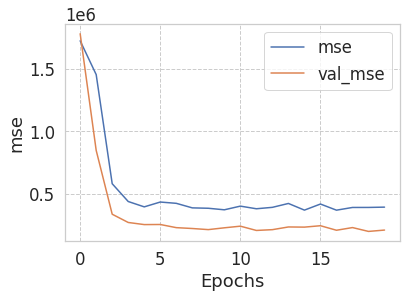

In [127]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mse')

In [128]:
yhat= model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [129]:
r2 = np.power(yhat - np.mean(Y_test), 2).sum() / np.power(Y_test - np.mean(Y_test), 2).sum()
r2

0.5148546035216464